## Imports

In [78]:
import sklearn as skl
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

---
## Dataset

O Dataset de teino é constituido por 18835 casos e pelos seguintes atributos:

* **song name:** nome da música
* **song_popularity:** valores entre 0 e 100
* **song_duration_ms:** duração da música em milisegundos; tipicamente valores entre 200k e 300k
* **acousticness:** valores entre 0 e 1
* **danceability:** valores entre 0 e 1
* **energy:** valores entre 0 e 1
* **instrumentalness:** valores entre 0 e 1
* **key:** todas as chaves em oitava codificadas como valores entre 0 e 11, começando com C como 0, C como 1, etc.
* **liveness:** valores entre 0 e 1
* **loudness:** float com valores tipicamente entre -60 e 0
* **audio_mode:** 0 = menor, 1 = maior
* **speechiness:** valores entre 0 e 1
* **tempo:** float com valores tipicamente entre 50 e 150
* **audio_valence:** quão felizes a feliz a música é; valores entre 0 e 1
* **time-signature:** valores entre 1 e 5

---
## Get Data

In [79]:
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [80]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [81]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [82]:
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [83]:
song_df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [84]:
# How many songs are duplicated?
song_df.duplicated().sum()

3909

In [85]:
# Min and max values for each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

song_df.apply(minMax)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
min,"""40"" - Live Version 1983",0,12000,0.000001,0.000,0.00107,0.000,0,0.0109,-38.768,0,0.000,0.000,0,0.000
max,피 땀 눈물,100,1799346,0.996000,0.987,0.99900,0.997,11,0.9860,1.585,1,0.941,242.318,5,0.984


<AxesSubplot:>

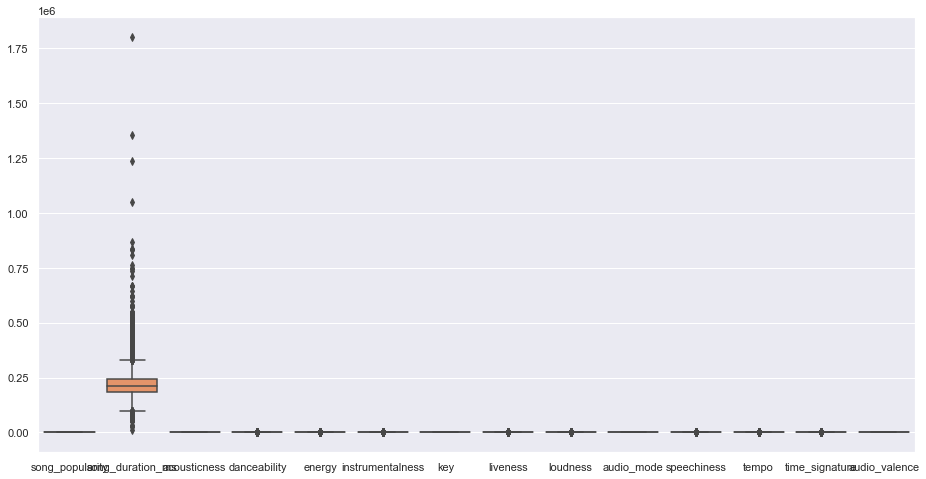

In [86]:
# Outliers boxplot seaborn
sns.set_theme(palette="pastel")
plt.subplots(figsize=(14,8))
sns.boxplot(data=song_df)

<AxesSubplot:>

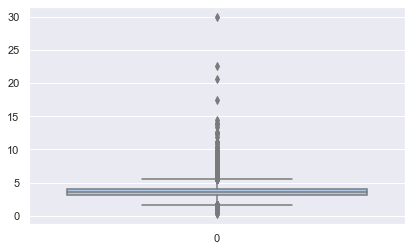

In [87]:
# Outliers em minutos
sns.boxplot(data=song_df['song_duration_ms'].apply(lambda x: x/60000))

<AxesSubplot:>

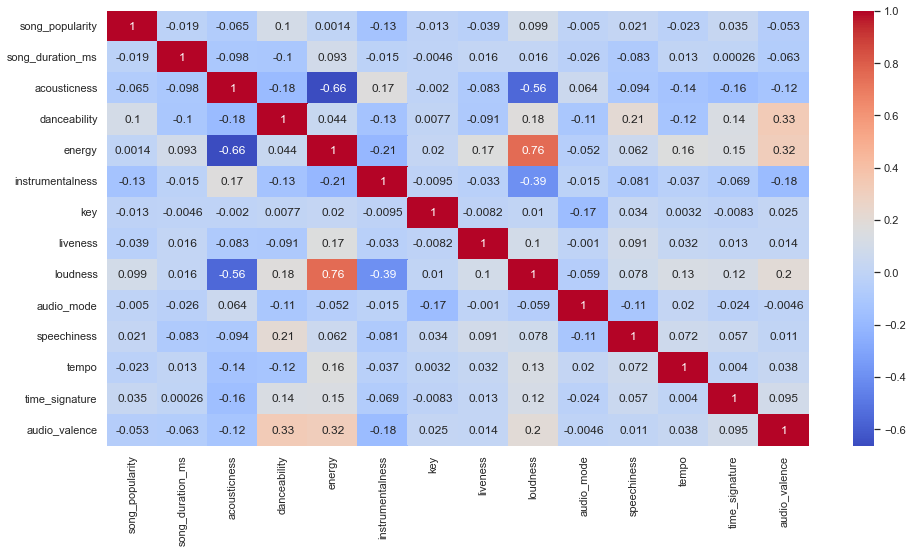

In [88]:
plt.subplots(figsize=(14,8))
sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')

In [89]:
#song_df.plot(kind="scatter",x="liveness",y="song_popularity", figsize=(9,9), color="black");

---
## Limpeza de Dados


In [90]:
#Remover duplicados
song_df = song_df.drop_duplicates()

#Remover nome
song_df = song_df.drop(['song_name'], axis=1)


In [91]:
#One Hot Encoding
for i in song_df.columns:
    if song_df[i].nunique() == 2:
        song_df[i] = pd.get_dummies(song_df[i], drop_first=True, prefix=i)
    elif song_df[i].nunique() > 2 and song_df[i].nunique() < 16:
        song_df = pd.concat([song_df, pd.get_dummies(song_df[i], prefix=i)], axis=1)
        song_df = song_df.drop([i], axis=1)

song_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,1,0,0,0,0,0,0,1,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,0,0,0,0,0,0,0,1,0
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,...,0,0,0,0,0,0,0,0,1,0
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,1,0
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Remoção de outliers
for i in song_df.columns:
    if(song_df[i].nunique() >= 16):#Não categoricos
        mean=song_df[i].mean()

        skewness=song_df[i].skew()

        if(skewness > 0.5 or skewness < -0.5):#Distriuido normalmente
            upper=song_df[i].mean() + 3*song_df[i].std()
            lower=song_df[i].mean() - 3*song_df[i].std()

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 
        else:#Distriuido não normalmente(Skewed)
            q1 = song_df[i].quantile(0.25)
            q3 = song_df[i].quantile(0.75)
            iqr = q3 - q1
            upper = q3 + 1.5*iqr
            lower = q1 - 1.5*iqr

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 

In [ ]:
#Normalização dos dados
for i in song_df.columns:
        max_value = song_df[i].max()
        min_value = song_df[i].min()
        song_df[i] = (song_df[i] - min_value) / (max_value - min_value)

song_df.describe()

# Regression Problem - Supervised Learning

---
## Linear Regression

In [92]:
from sklearn import linear_model

In [93]:
# Initialize model
regression_model =  linear_model.LinearRegression()

# Train the model using the song_df data
regression_model.fit(X = pd.DataFrame(song_df["danceability"]),y = song_df["song_popularity"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients 
print(regression_model.coef_)


44.20891020036487
[7.27285092]


The coefficient is telling us that as the danceability increases by 1 unit, the song popularity increases 14   

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

About 1% of the variance in the song_popularity can be explained by the danceability.

In [94]:
regression_model.score(X = pd.DataFrame(song_df["danceability"]),y = song_df["song_popularity"])

0.00318259646006791

Residuals are diffrences between what the model predicst for each data point and the actual value of each data point.
## Extraction of the model's residuals

In [95]:
train_prediction = regression_model.predict(X = pd.DataFrame(song_df["danceability"]))

# Actual - prediction = residuals
residuals = song_df["song_popularity"] - train_prediction

residuals.describe()

count    1.492600e+04
mean     3.777882e-15
std      2.034701e+01
min     -5.126358e+01
25%     -1.153172e+01
50%      2.961917e+00
75%      1.480101e+01
max      5.079464e+01
Name: song_popularity, dtype: float64

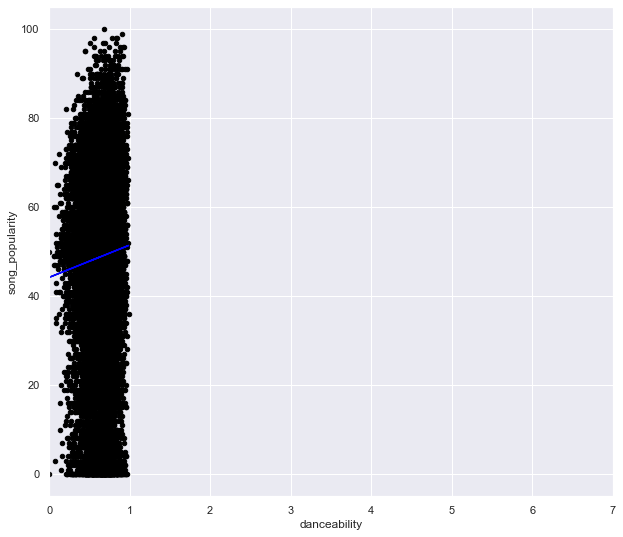

In [96]:
song_df.plot(kind="scatter",x="danceability",y="song_popularity",figsize=(9,9),color="black",xlim=(0,7))

# Plot regression line
plt.plot(song_df["danceability"],   # Explanitory variable
        train_prediction,           # Predicted values
        color="blue");


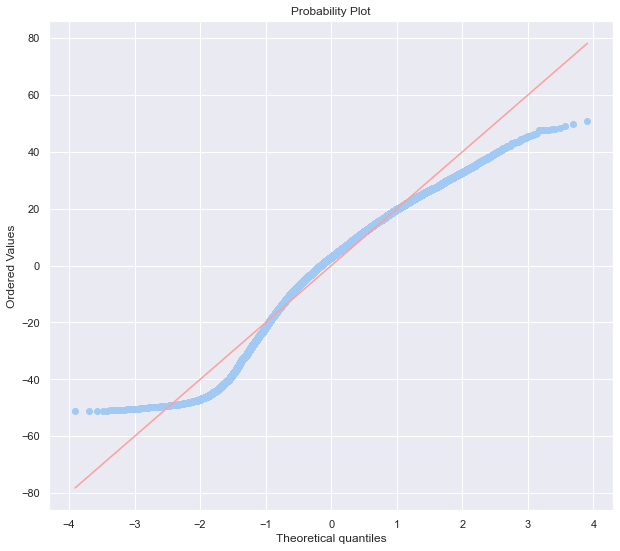

In [97]:
import scipy.stats as stats
plt.figure(figsize=(9,9))
stats.probplot(residuals, dist="norm", plot=plt);


## Root mean squared error metric evaluation

In [98]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, song_df["song_popularity"])

20.34632799142185

In [99]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, song_df["song_popularity"])**0.5
RMSE

20.34632799142185

---
## Polynomial Regression

In [100]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([ song_df["danceability"],        # Include danceability    
                            song_df["danceability"]**2]).T  # Include danceability squared

# Train the model using song_df data
poly_model.fit(X = predictors, y = song_df["song_popularity"])

# Check trained model y-intercept
print("Model intercept")
print(regression_model.intercept_)

# Check trained model coefficients 
print("Model coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model R-squared")
print(poly_model.score(X = predictors, y = song_df["song_popularity"]))


Model intercept
44.20891020036487
Model coefficients
[ 8.35094437 -0.90827377]
Model R-squared
0.0031847905538369137


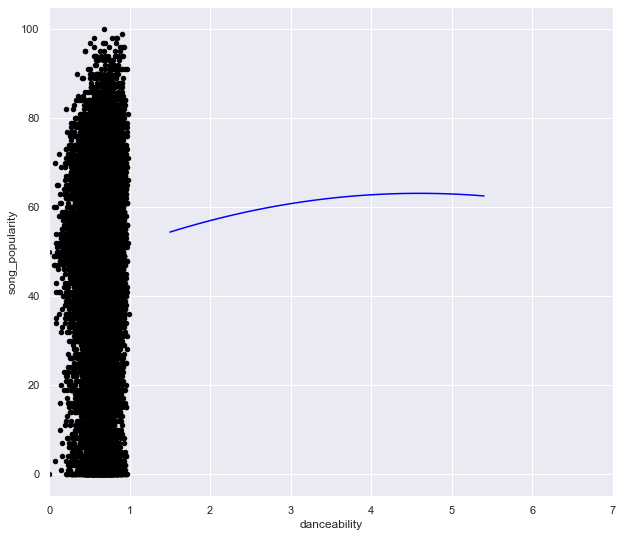

In [101]:
# Plot the curve from q.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

song_df.plot(kind="scatter",x="danceability",y="song_popularity",figsize=(9,9),color="black",xlim=(0,7))

# Plot curve line 
plt.plot(poly_line_range,   # X-axis range
        y_values,           # Predicted values
        color="blue");

In [102]:
preds = poly_model.predict(X=predictors)
rmse(preds,song_df["song_popularity"])

20.346305599268643

---
## Multiple Linear Regression

In [103]:
# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Train the model using the song_df data
multi_reg_model.fit(X = song_df.loc[:,["danceability", "loudness"]], y = song_df["song_popularity"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "danceability")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = song_df.loc[:,["danceability","loudness"]], y = song_df["song_popularity"])


46.51750606857678
[6.29677132 0.22130645]


0.005029711573707796

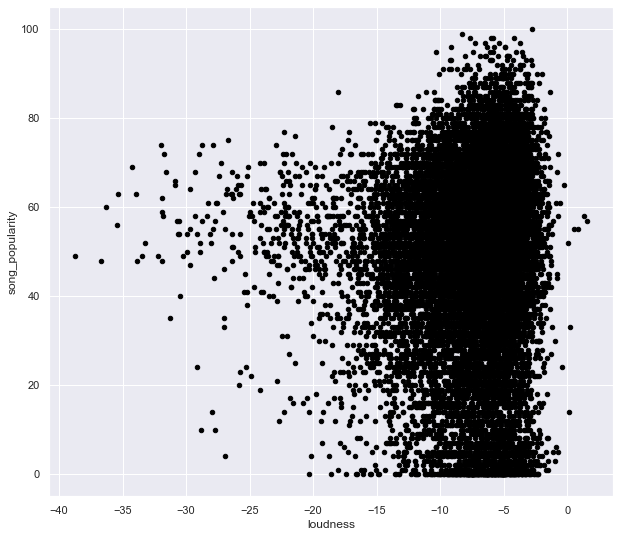

In [104]:
song_df.plot(kind="scatter",x="loudness",y="song_popularity",figsize=(9,9),color="black");

---
## Final Multiple Regression Model

In [105]:
# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([song_df["danceability"],song_df["loudness"],song_df["danceability"]**2,song_df["loudness"]**2]).T

# Train the model using the song_df data
multi_reg_model.fit(X = poly_predictors, y = song_df["song_popularity"])

# Check R-squared
print("R-squared")
print(multi_reg_model.score(X = poly_predictors, y = song_df["song_popularity"]))

# Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(X = poly_predictors), song_df["song_popularity"]))


R-squared
0.0101424401211605
RMSE
20.275173883431965


---
# Clustering Problem - Unsupervised learning

In [106]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [107]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=None
)

features[:5]

true_labels[:5]

array([2, 1, 2, 2, 2])

#### Standardization

In [108]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[-0.05810182, -0.29589199],
       [ 1.76500964,  1.17920654],
       [ 0.38954558, -0.33878745],
       [ 0.52242961, -0.7772404 ],
       [-1.15321417, -0.76936817]])

---
## K-Means

In [109]:
# Instantiate the K-Means class
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=None
)

# Fit the K-Means to the data in scaled_features
kmeans.fit(scaled_features)


KMeans(init='random', n_clusters=3)

In [110]:
# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_

kmeans.labels_[:5]

array([1, 0, 1, 1, 2], dtype=int32)

### Choosing the appropriate number of clusters
#### Elbow method

In [111]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

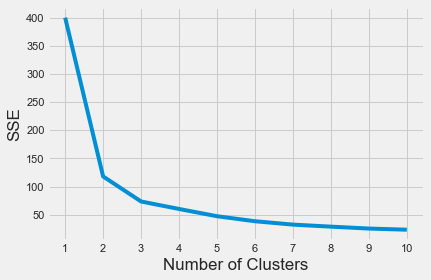

In [112]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [113]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


3

#### Silhouette coefficient

In [114]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

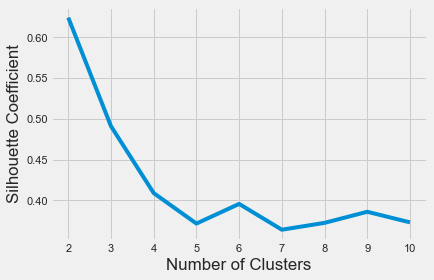

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

---
## Decision Tree Regression

In [116]:
X = song_df.iloc[:, 1:2].values
y = song_df.iloc[:, 2].values

In [119]:
#Import the regressor
from sklearn.tree import DecisionTreeRegressor 

#Create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

#Fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

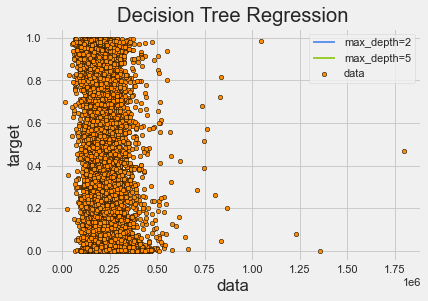

In [132]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [125]:
#Predicting a new result
y_pred = regressor.predict(np.array([5.5]).reshape(1,1))

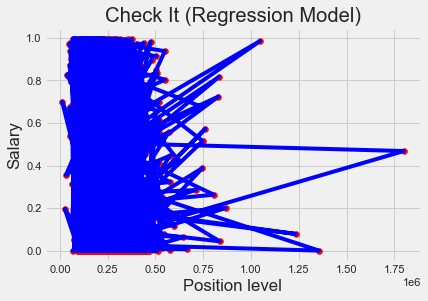

In [126]:
#Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [129]:
y_pred = regressor.predict(np.array([5.5]).reshape(1,1))

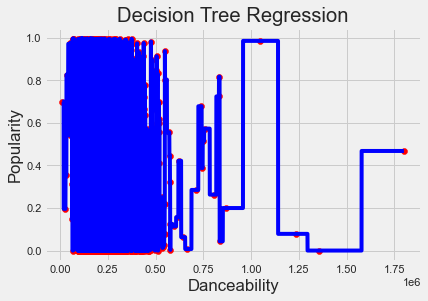

In [135]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# specify title
plt.title('Decision Tree Regression') 

# specify X axis label
plt.xlabel('Danceability')

# specify Y axis label
plt.ylabel('Popularity')

# show the plot
plt.show()

In [134]:
#Import export_graphviz
from sklearn.tree import export_graphviz 

#Export the decision tree to a tree.dot file
#For visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', 
                feature_names =["song_popularity"])

---
## Random Forest Regression

In [178]:
X = song_df.iloc[:,-1:].values
y = song_df.iloc[:, -1:].values

In [180]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [173]:
#Import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#Fitting Random Forest Regression to the dataset
#Create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

#Fit the regressor with x and y data
rf_regressor.fit(X.reshape(-1,1),y.reshape(-1,1))


/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestRegressor(random_state=0)

In [174]:

# Predicting the target values of the test set
y_pred = rf_regressor.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.112


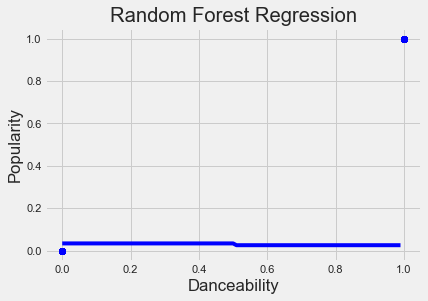

In [181]:
# Visualising the Random Forest Regression results
X_grid = np.arange(min(X), max(X), 0.01) 

# Reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  

# Plot predicted data
plt.plot(X_grid, rf_regressor.predict(X_grid), 
        color = 'blue') 
plt.title('Random Forest Regression')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()